In [1]:
# Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

# Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

# Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("drive/MyDrive/Newdataset.csv")

In [4]:
data.head()

,Time,Type,Amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Class
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 1045971
Number of Normal Transactions are 1044835
Number of fraudulent Transactions are 1136
Percentage of fraud Transactions is 0.11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045971 entries, 0 to 1045970
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1045971 non-null  int64  
 1   Type            1045971 non-null  int64  
 2   Amount          1045971 non-null  float64
 3   oldbalanceOrg   1045971 non-null  float64
 4   newbalanceOrig  1045971 non-null  float64
 5   oldbalanceDest  1045971 non-null  float64
 6   newbalanceDest  1045971 non-null  float64
 7   Class           1045971 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 63.8 MB


In [7]:
min(data.Amount), max(data.Amount)

(0.1, 10000000.0)

In [8]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [9]:
data.drop(['Time'], axis=1, inplace=True)

In [10]:
data.shape

(1045971, 7)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(1043011, 7)

In [13]:
# Training and Testing
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [14]:
# Different Models

# Model 1: Decision Tree
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993480428502033
F1 score of the Decision Tree model is 0.5887096774193549


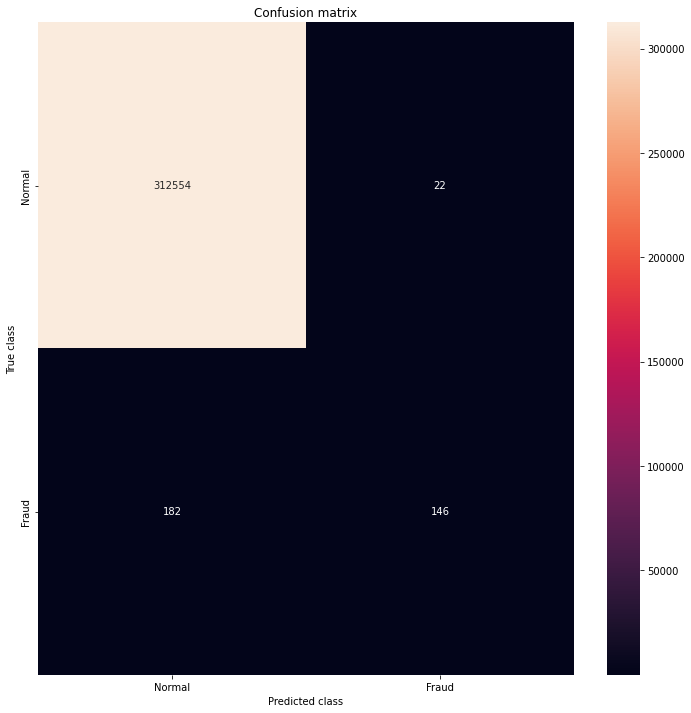

In [15]:
LABELS_1 = ['Normal', 'Fraud']
conf_matrix_1 = confusion_matrix(y_test, dt_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_1, xticklabels = LABELS_1, yticklabels = LABELS_1, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [16]:
# Model 2: K Nearest Neighbours (KNN)
n = 8
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9992617544039066
F1 score of the K-Nearest Neighbors model is 0.5407554671968191


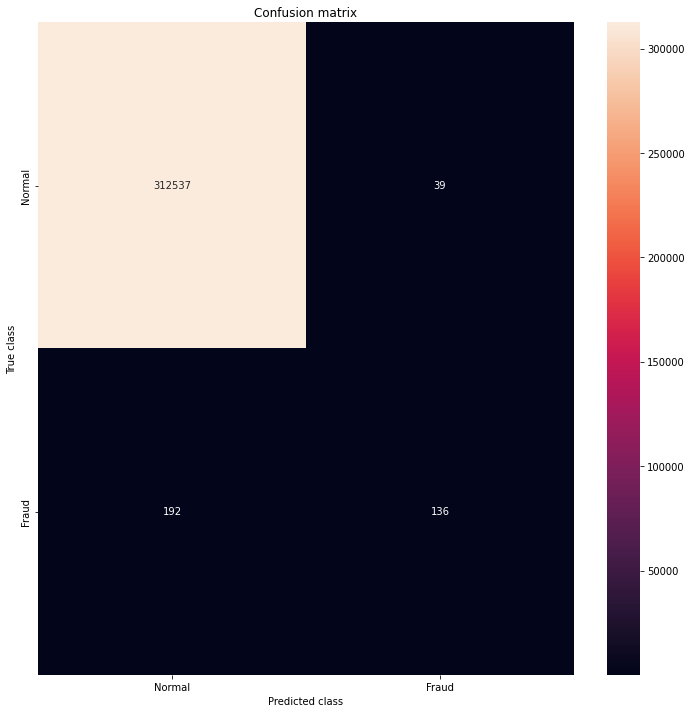

In [17]:
LABELS_2 = ['Normal', 'Fraud']
conf_matrix_2 = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_2, xticklabels = LABELS_2, yticklabels = LABELS_2, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [18]:
# Model 3: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.99917546595761
F1 score of the Logistic Regression model is 0.471311475409836


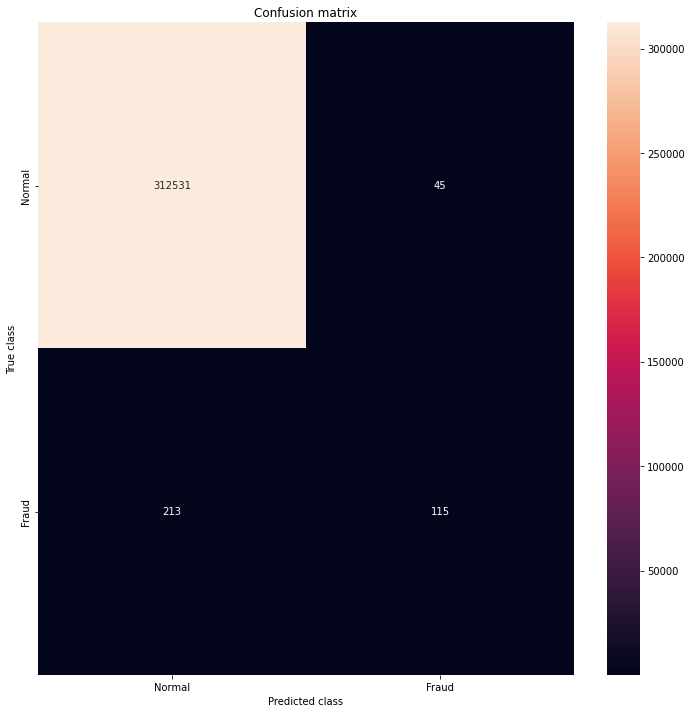

In [21]:
LABELS_3 = ['Normal', 'Fraud']
conf_matrix_3 = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_3, xticklabels = LABELS_3, yticklabels = LABELS_3, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [19]:
# Model 4: Random Forest
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991594866157032
F1 score of the Random Forest model is 0.33078880407124683


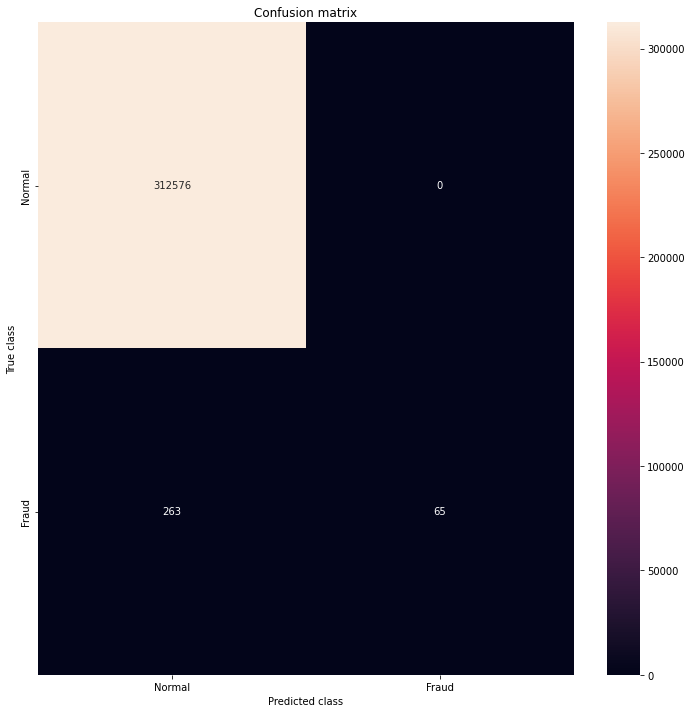

In [22]:
LABELS_4 = ['Normal', 'Fraud']
conf_matrix_4 = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_4, xticklabels = LABELS_4, yticklabels = LABELS_4, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [20]:
# Model 5: XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995973205839491
F1 score of the XGBoost model is 0.7649253731343284


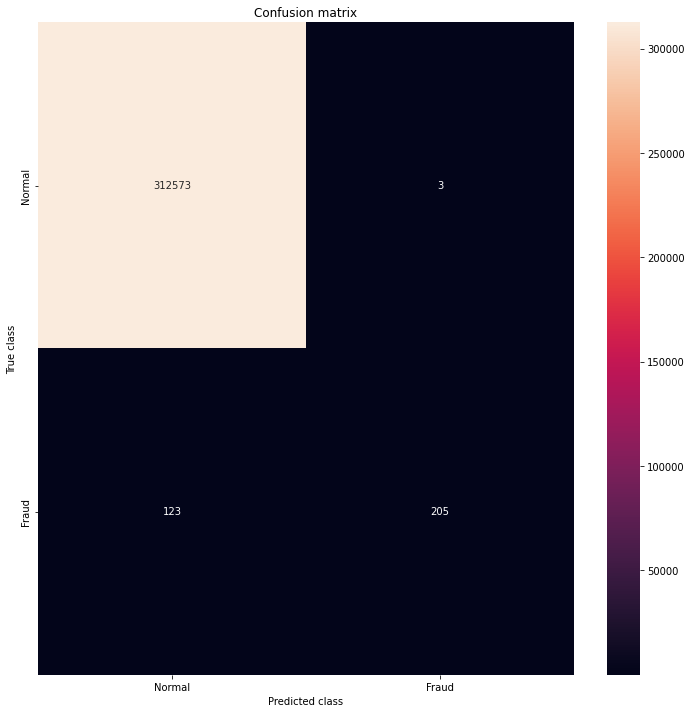

In [23]:
LABELS_5 = ['Normal', 'Fraud']
conf_matrix_5 = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_5, xticklabels = LABELS_5, yticklabels = LABELS_5, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()